# Notebook generating plot(s) for blog post on gender gap

Start by getting data on hourly wages by gender over time

In [8]:
# Simulate
from dstapi import DstApi
import seaborn as sns
import matplotlib.pyplot as plt

lon = DstApi("LONS20")
params = {'table': 'lons20',
 'format': 'BULK',
 'lang': 'da',
 'variables': [{'code': 'ARBF', 'values': ['TOT']},
  {'code': 'SEKTOR', 'values': ['1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['STAND']},
  {'code': 'KØN', 'values': ['M', 'K']},
  {'code': 'Tid', 'values': ['*']}]}

df = lon.get_data(params=params)[["KØN", "TID", "INDHOLD"]]


Plot

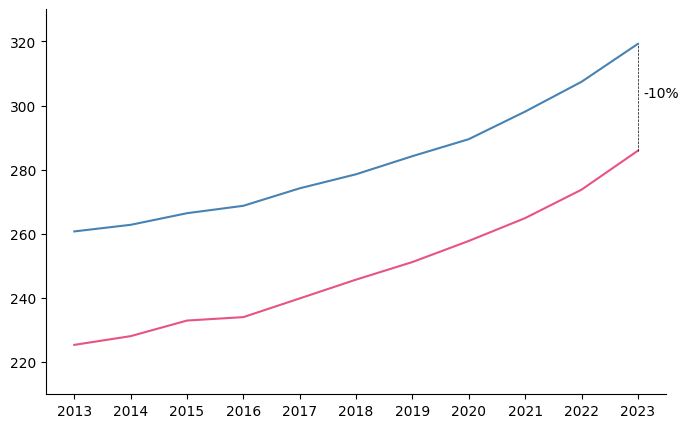

In [ ]:
#| label: fig-gender-gap-basic
#| fig-cap: >
#|   Gender gap in hourly wages for
#|   private sector employees, Danish kroner.
#|   \n Source: www.statistikbanken.dk/LONS20

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

kvcolor = "#E75480"
mdcolor = "#4682B4"

sns.lineplot(
    x="TID", y="INDHOLD", hue="KØN", data=df,
    palette={"Kvinder": kvcolor, "Mænd": mdcolor},
    legend=False, ax=ax
    )

plt.xticks(df["TID"].unique())

kvinder_val = df.loc[(df["KØN"] == "Kvinder") & (df["TID"] == df["TID"].max()), "INDHOLD"].values[0]
maend_val = df.loc[(df["KØN"] == "Mænd") & (df["TID"] == df["TID"].max()), "INDHOLD"].values[0]
diff = 100*(kvinder_val - maend_val)/(maend_val) 

plt.annotate(
  f"{diff:.0f}%",
  xy=(df["TID"].max(), (kvinder_val + maend_val)/2),
  xytext=(df["TID"].max() + 0.1,
  (kvinder_val + maend_val)/2),
  )

plt.plot([df["TID"].max(), df["TID"].max()], [kvinder_val, maend_val], lw=0.5, ls='--', color='black')

plt.xlabel("")
plt.ylabel("")

plt.ylim(210, 330)

sns.despine()
plt.show()